In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [7]:
img1 = Image.open("nikol.png")
img1.load()
img2 = Image.open("quay.jpg")
img2.load()
img3 = Image.open("lenna.png")
img3.load()
img4 = Image.open("plot.gif").convert('RGB')
img4.load()

In [8]:
images = [img1, img2, img3, img4]

for img in images:
    print(np.array(img).shape)

(4354, 7728, 3)
(4352, 7712, 3)
(2048, 2048, 3)
(360, 640, 3)


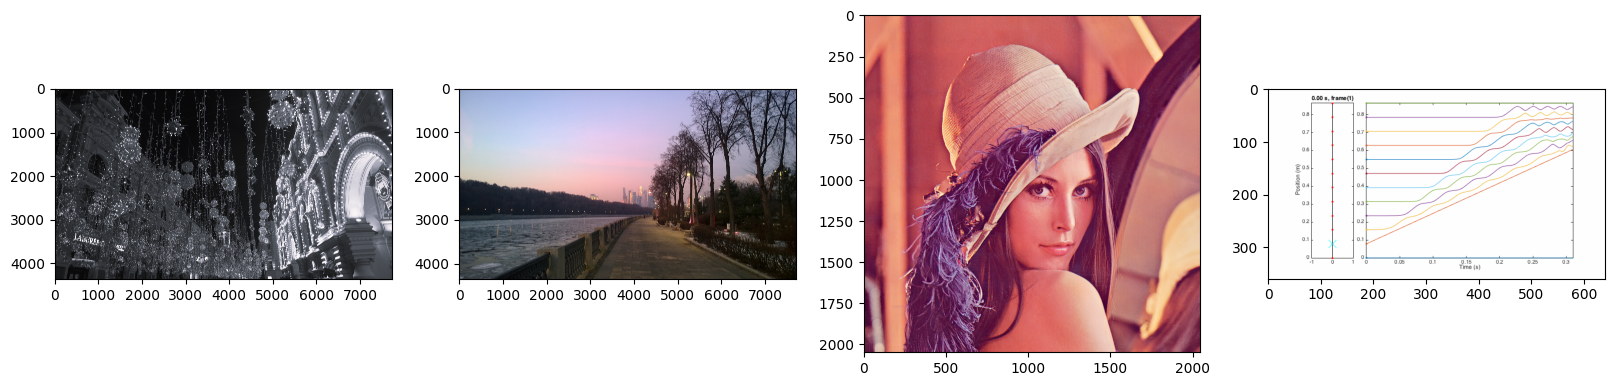

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(20, 40))
for i in range(len(images)):
    ax[i].imshow(np.array(images[i]))

In [10]:
def calc_size(img_size, max_size):
    if img_size[0] > img_size[1]:
        return((max_size, int(max_size * img_size[1] / img_size[0])))
    else:
        return((int(max_size * img_size[0] / img_size[1]), max_size))

In [11]:
for i in range(len(images)):
    images[i] = images[i].resize(calc_size(images[i].size, 512))
    print(np.array(images[i]).shape)

(288, 512, 3)
(288, 512, 3)
(512, 512, 3)
(288, 512, 3)


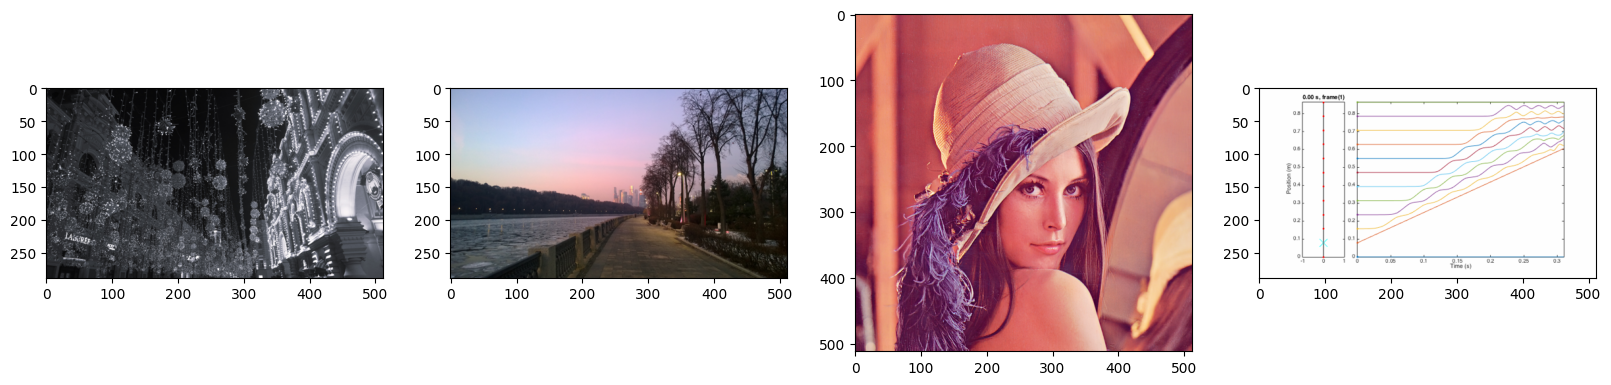

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(20, 40))
for i in range(len(images)):
    ax[i].imshow(np.array(images[i]))

In [13]:
def make_grey(img):
    new_img = []
    for x in np.array(img):
        new_x = []
        for y in x:
            color = np.mean(y)
            new_x.append(color)
        new_img.append(new_x)
    return new_img

In [14]:
def draw_plots(images, fsize, bins=30, dens=False):
    fig, ax = plt.subplots(2, len(images), figsize=fsize)
    for i in range(len(images)):
        ax[0][i].imshow(np.array(images[i]), cmap="gray")
        ax[1][i].hist(np.array(images[i]).reshape(-1), edgecolor="black", alpha=0.5, bins=bins, density=dens)
        ax[1][i].set_xlim(0, 255)

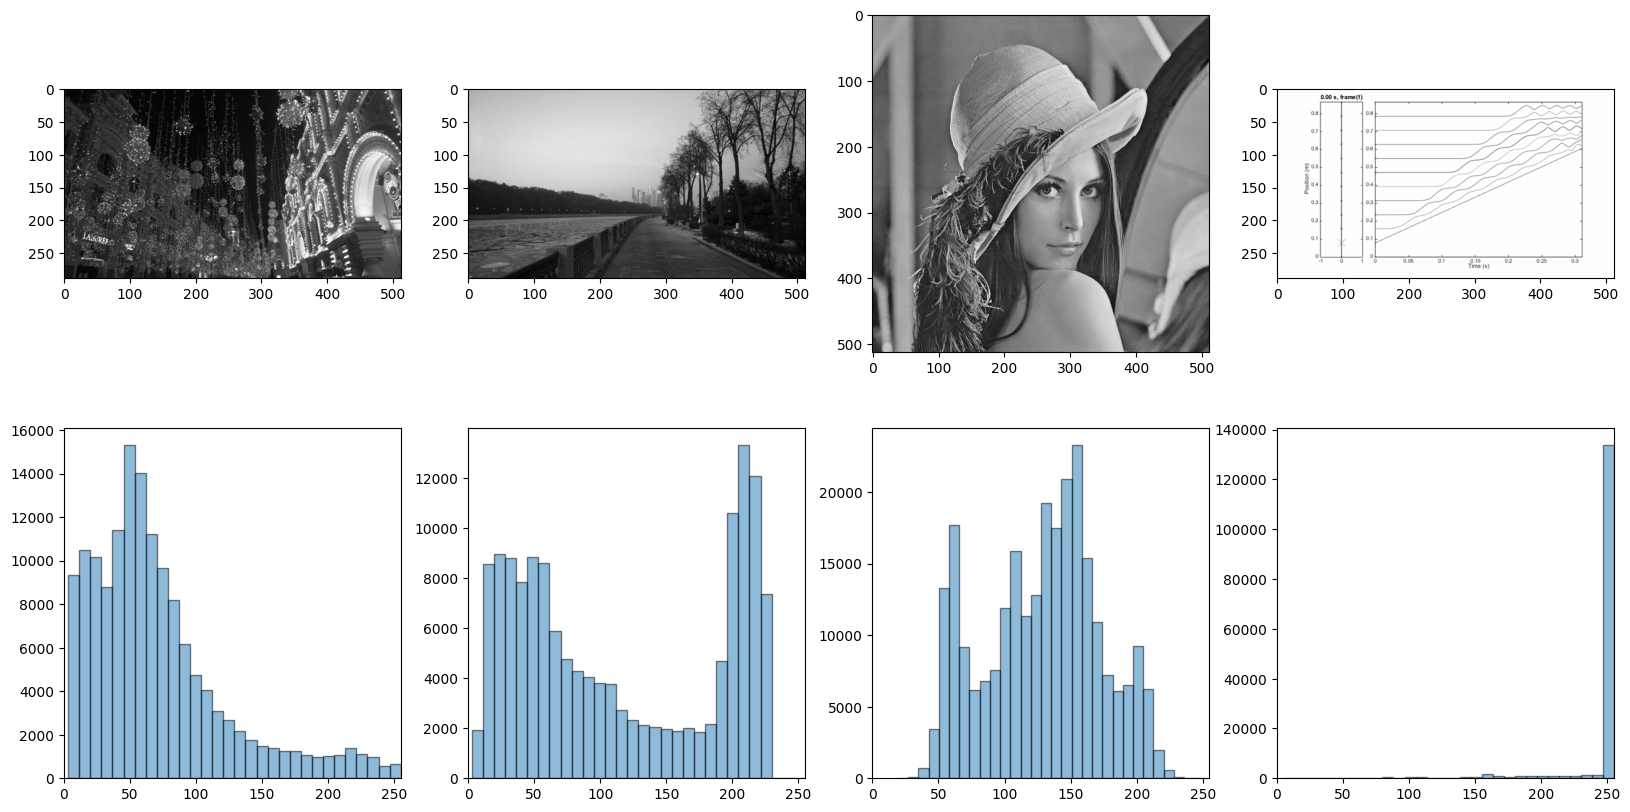

In [15]:
gray_images = []
for img in images:
    gray_images.append(make_grey(img))

draw_plots(gray_images, (20, 10))